# CHENNAI HOUSE PRICE PREDICTION

# Problem Statement
Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?

## Minimum Requirements
It is not sufficient to just fit a model - the model must be analysed to find the important factors that contribute towards the price. Also, it will be better to give a forecast range (range of permissible values) rather than a single estimate as it will help the customers to negotiate.

# Importing Libraries

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='darkgrid')
import math
from math import sqrt
import warnings
warnings.filterwarnings("ignore")

In [178]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.datasets import make_regression
from sklearn.svm import SVR
from sklearn.datasets import make_regression
from sklearn import tree
import xgboost as xgb

# Reading Data Set

In [149]:
df=pd.read_csv("Chennai houseing sale.csv")
df.shape
df.head()

PRT_ID        AREA  INT_SQFT   DATE_SALE  DIST_MAINROAD  N_BEDROOM  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   N_BATHROOM  N_ROOM SALE_COND PARK_FACIL  ... UTILITY_AVAIL  STREET MZZONE  \
0         1.0       3  AbNormal        Yes  ...        AllPub   Paved      A   
1         1.0       5  AbNormal         No  ...        AllPub  Gravel     RH   
2         1.0       3  AbNormal        Yes  ...           ELO  Gravel     RL   
3         2.0       5    Family         No  ...       NoSewr    Paved      I   
4         1.0       3  AbNormal        Yes  ...        AllPub  Gravel      C   

  QS_ROOMS QS_BATHROOM  QS_BEDROOM  QS_OVERALL  REG_FEE  COMMIS  SALES_PRICE  
0      4.0         3.9         4.9       4.330   380000  144400      7600000  
1      4.9         4.2         2.5       3.765   760122  304049     21717770  
2      4.1         3.8         2.2       3.090   421094   92114     13159200  
3      4.7         3.9         3.6       4.010   356321   77042      9630290  
4      3.0         2.5         4.1       3.290   237000   74063      7406250  

[5 rows x 22 columns]

In [150]:
df.shape

(7109, 22)

#Data Cleaning

In [151]:
df.groupby('BUILDTYPE')['BUILDTYPE'].agg('count')

BUILDTYPE
Comercial        4
Commercial    2325
House         2444
Other           26
Others        2310
Name: BUILDTYPE, dtype: int64

In [152]:
df.groupby('AREA')['AREA'].agg('count')

AREA
Adyar          773
Adyr             1
Ana Nagar        3
Ann Nagar        2
Anna Nagar     783
Chormpet         6
Chrmpet          6
Chrompet      1681
Chrompt          9
KK Nagar       996
KKNagar          1
Karapakam        3
Karapakkam    1363
T Nagar        496
TNagar           5
Velachery      979
Velchery         2
Name: AREA, dtype: int64

In [153]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [154]:
# Removing all the null values
df1=df.dropna()
df1.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [155]:
# Renaming all the column names in lowercase letters
df1.columns = df1.columns.str.lower()

In [156]:
# Renaming all the string in all column names in lowercase letters
df1.area = df1.area.str.lower()
df1.sale_cond = df1.sale_cond.str.lower()
df1.park_facil = df1.park_facil.str.lower()
df1.buildtype = df1.buildtype.str.lower()
df1.utility_avail = df1.utility_avail.str.lower()
df1.street = df1.street.str.lower()
df1.mzzone = df1.mzzone.str.lower()

# Correcting the spelling mistakes in all columns

In [157]:
# Correcting the spelling mistakes in all columns
df1.area = df1.area.replace({'velchery' :'velachery',
                        'kknagar':'kk nagar', 
                       'tnagar':'t nagar', 
                       'chormpet':'chrompet', 
                       'chrompt':'chrompet', 
                       'chrmpet':'chrompet', 
                       'ana nagar':'anna nagar', 
                       'ann nagar':'anna nagar',
                       'karapakam':'karapakkam', 
                       'adyr':'adyar'})

In [158]:
df1.sale_cond = df1.sale_cond.replace({'adj land':'adjland', 
                       'normal sale':'normal sale',
                       'partiall':'partial',
                       'ab normal':'abnormal'})

In [159]:
df1.park_facil = df1.park_facil.replace({'noo':'no'})


In [160]:
df1.buildtype = df1.buildtype.replace({'comercial':'commercial', 
                       'others':'other'})


In [161]:
df1.utility_avail = df1.utility_avail.replace({'all pub':'allpub',
                                             'nosewr':'nosewa'})

In [162]:
df1.street = df1.street.replace({'pavd':'paved', 
                       'noaccess':'no access'})



## Fixing the correct Data Type of columns

In [163]:
df1.n_bedroom = df1.n_bedroom.astype(int)
df1.n_bathroom = df1.n_bathroom.astype(int)



### Correcting Date column from object to daterime format

In [164]:
df1.date_sale = pd.to_datetime(df1.date_sale, format='%d-%m-%Y')
df1.date_build = pd.to_datetime(df1.date_build, format='%d-%m-%Y')

#### Creating property_age column which deternine how old the property id

In [165]:
df1['property_age'] = pd.DatetimeIndex(df1.date_sale).year - pd.DatetimeIndex(df1.date_build).year


### Creating total_price column by adding 'reg_fee', 'commis', 'sales_price' columns

In [166]:
df1['total_price'] = pd.DataFrame(df1.reg_fee + df1.commis + df1.sales_price)

#### Rearranging the columns of dataframe 

In [167]:
df1 = df1.reindex(columns = ['prt_id', 'area', 'sale_cond', 'park_facil',
       'buildtype', 'utility_avail', 'street', 'mzzone', 
       'date_build', 'date_sale', 'property_age', 
       'int_sqft', 'dist_mainroad', 'n_bedroom','n_bathroom', 'n_room', 
       'qs_rooms', 'qs_bathroom', 'qs_bedroom', 'qs_overall', 
       'reg_fee', 'commis', 'sales_price', 'total_price'])
df1.head(7)


prt_id        area sale_cond park_facil   buildtype utility_avail  \
0  P03210  karapakkam  abnormal        yes  commercial        allpub   
1  P09411  anna nagar  abnormal         no  commercial        allpub   
2  P01812       adyar  abnormal        yes  commercial           elo   
3  P05346   velachery    family         no       other       nosewr    
4  P06210  karapakkam  abnormal        yes       other        allpub   
5  P00219    chrompet   partial         no  commercial        nosewa   
6  P09105    chrompet   partial         no       other        allpub   

      street mzzone date_build  date_sale  ...  n_bathroom  n_room  qs_rooms  \
0      paved      a 1967-05-15 2011-05-04  ...           1       3       4.0   
1     gravel     rh 1995-12-22 2006-12-19  ...           1       5       4.9   
2     gravel     rl 1992-02-09 2012-02-04  ...           1       3       4.1   
3      paved      i 1988-03-18 2010-03-13  ...           2       5       4.7   
4     gravel      c 1979-10-13 2009-10-05  ...           1       3       3.0   
5  no access     rh 2009-09-12 2014-09-11  ...           1       4       4.5   
6  no access     rl 1979-04-12 2007-04-05  ...           1       3       3.6   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  \
0          3.9         4.9       4.330   380000  144400      7600000   
1          4.2         2.5       3.765   760122  304049     21717770   
2          3.8         2.2       3.090   421094   92114     13159200   
3          3.9         3.6       4.010   356321   77042      9630290   
4          2.5         4.1       3.290   237000   74063      7406250   
5          2.6         3.1       3.320   409027  198316     12394750   
6          2.1         2.5       2.670   263152   33955      8488790   

   total_price  
0      8124400  
1     22781941  
2     13672408  
3     10063653  
4      7717313  
5     13002093  
6      8785897  

[7 rows x 24 columns]

# Exploratory Data Analysis

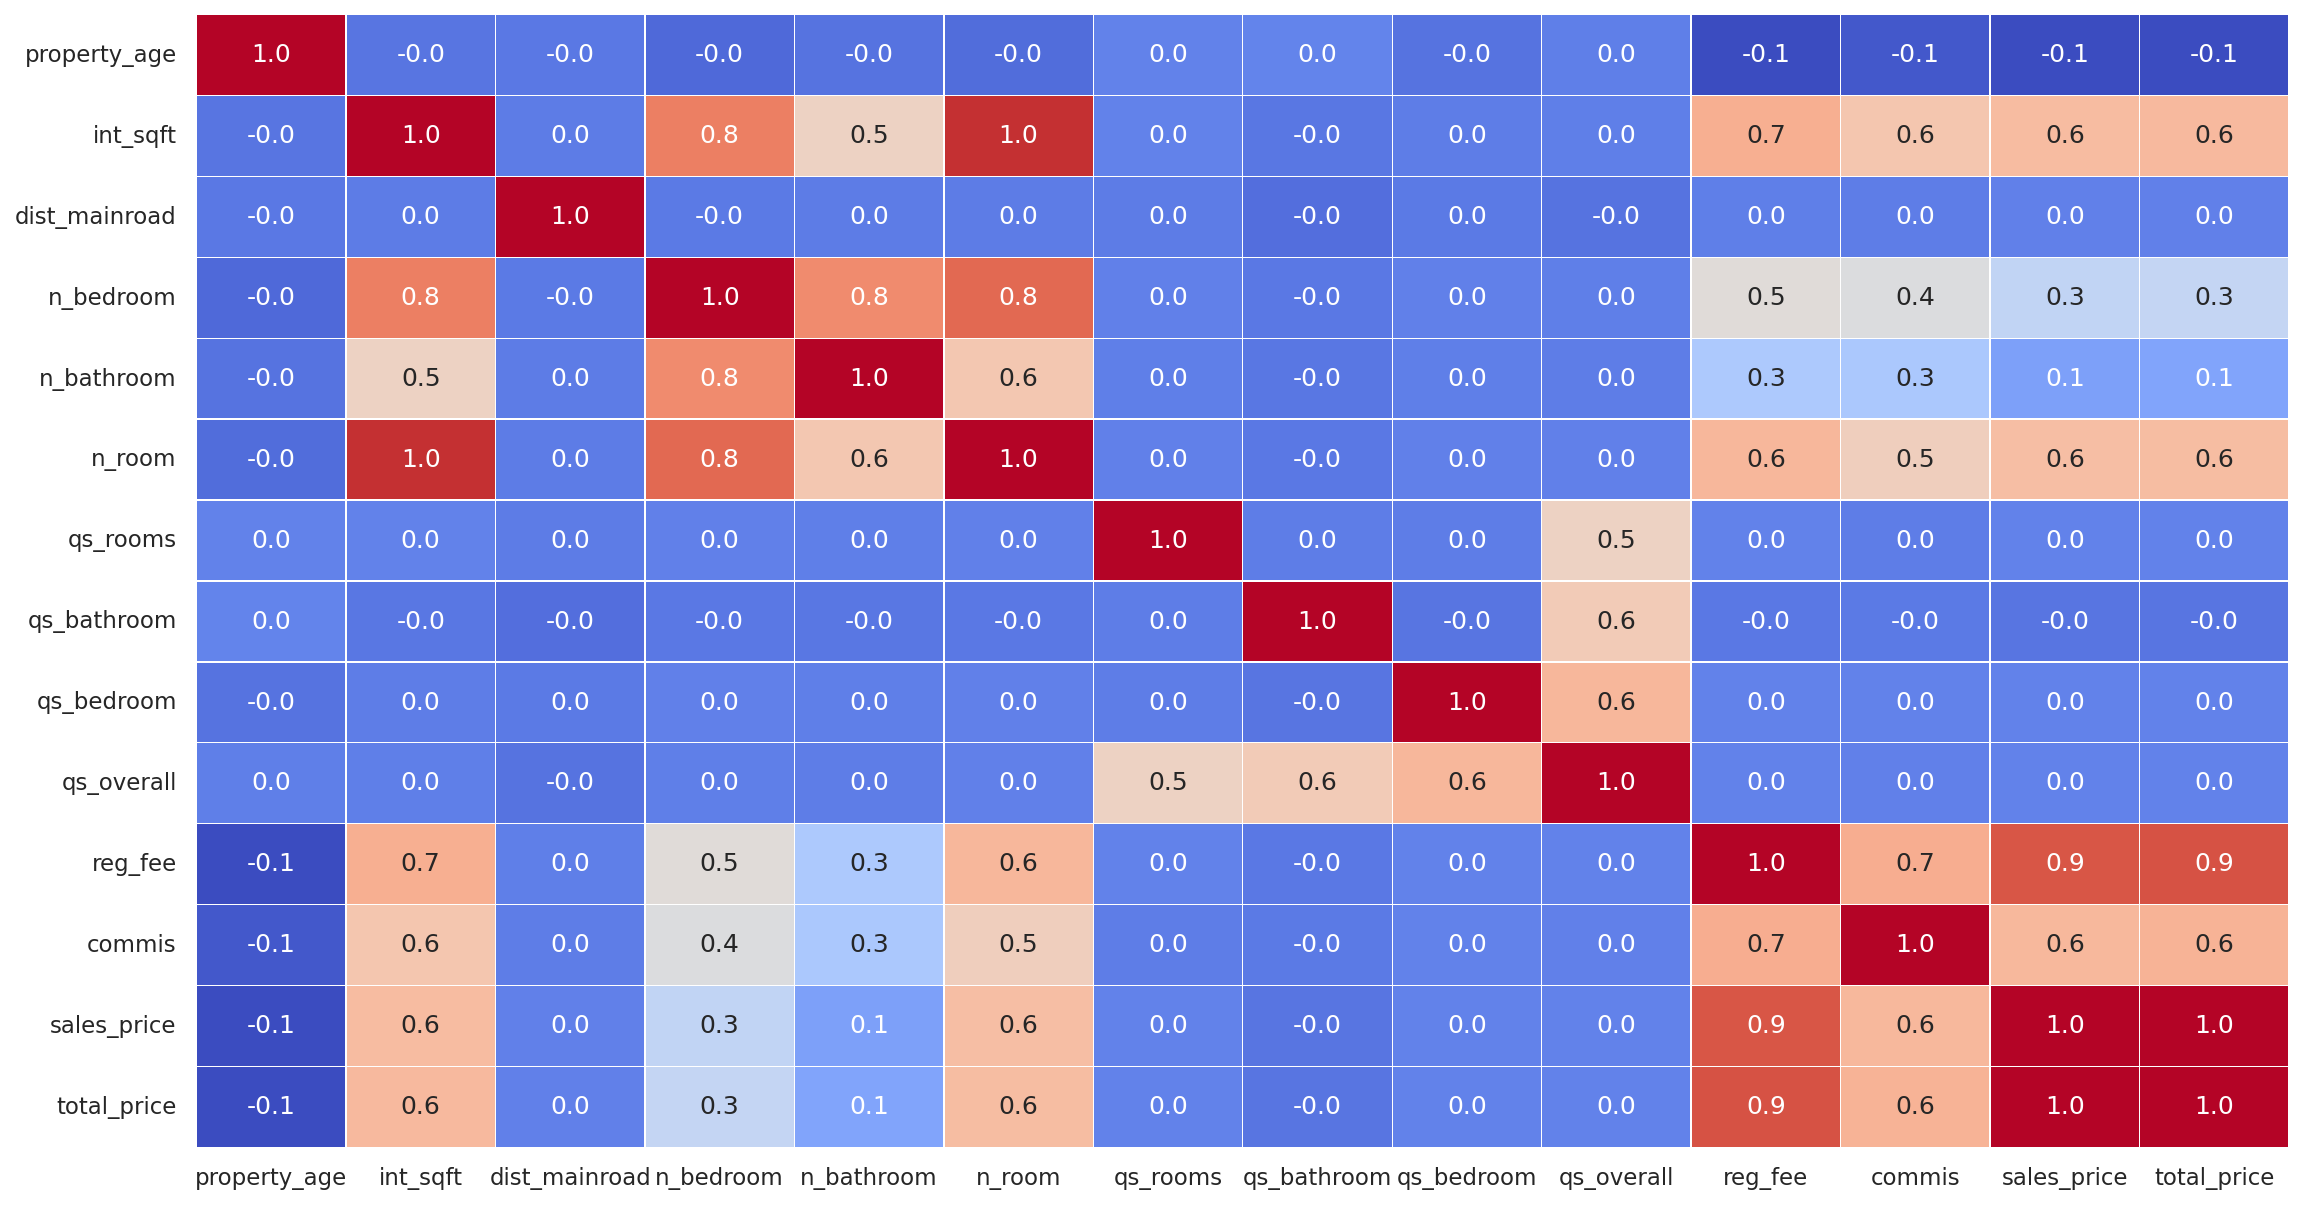

In [168]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df1.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm')

Here as we can see that in numerical columns there are some correlation between target and features which are shown in reddish colour.

##Distribution Of Features in Data Columns

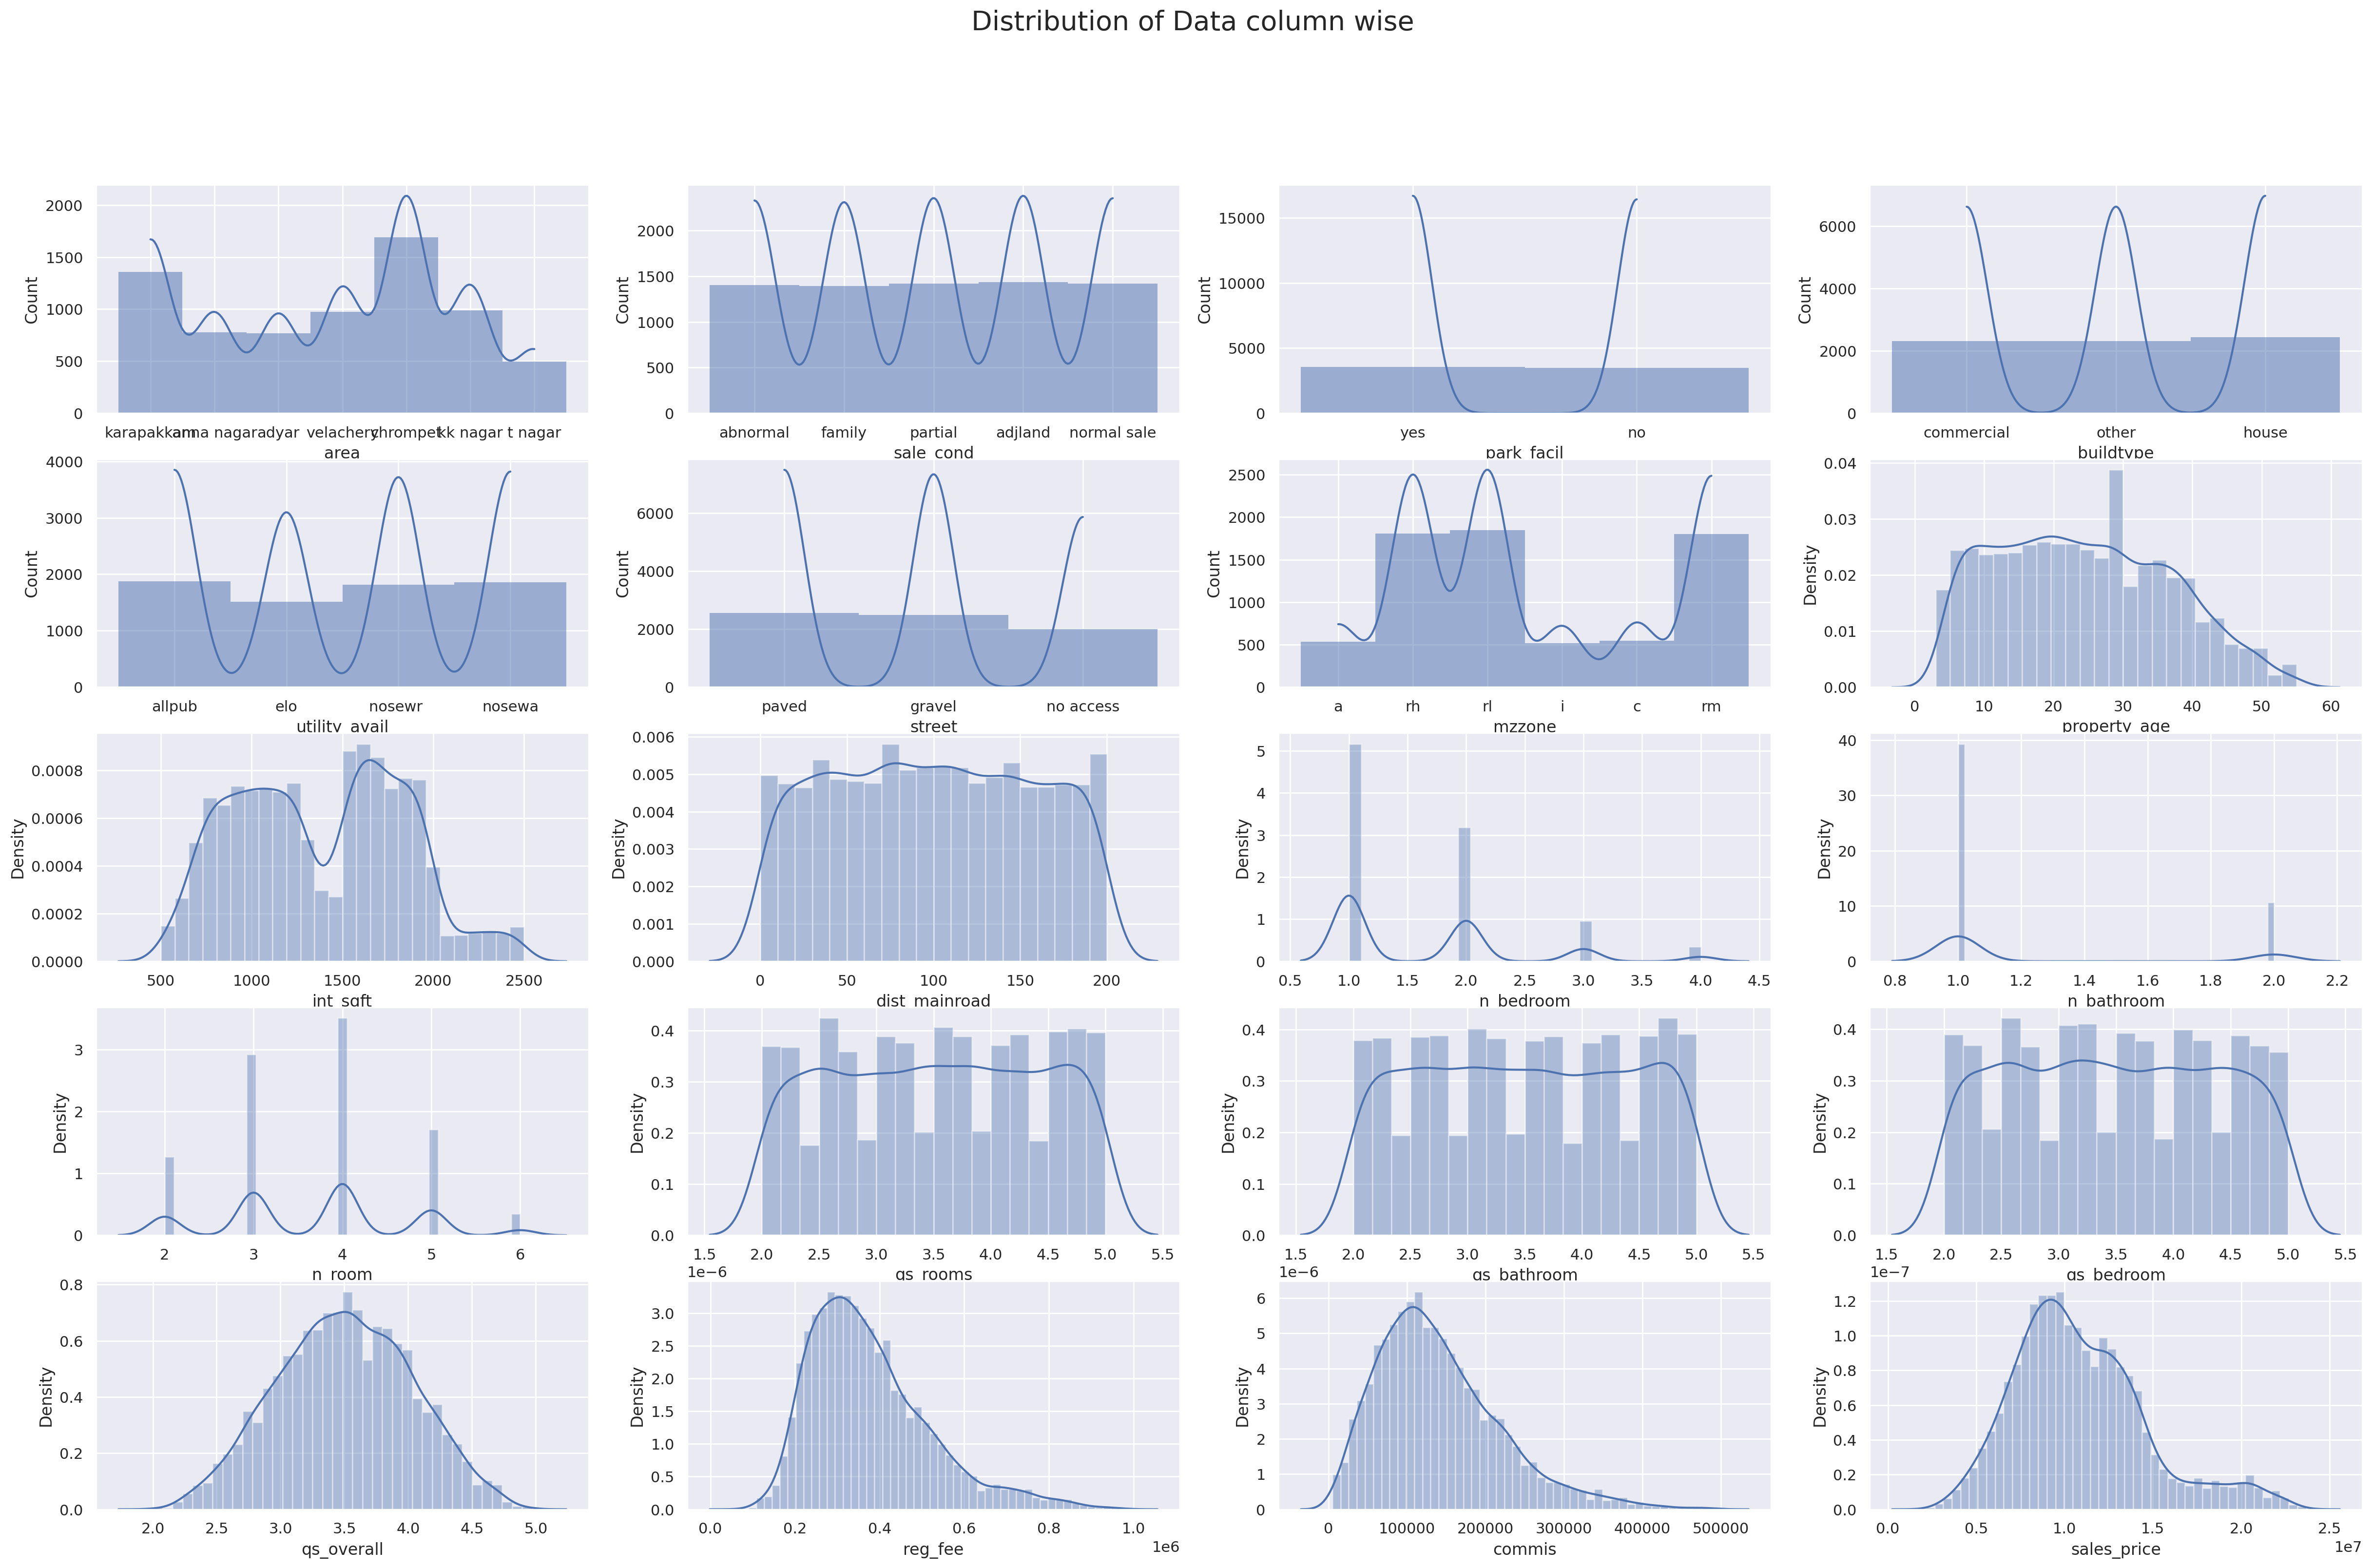

In [169]:
plt.figure(figsize=(30, 18), dpi=200)

plt.subplot(5,4,1)
sns.histplot(df1.area, linewidth=0,kde=True)

plt.subplot(5,4,2)
sns.histplot(df1.sale_cond, linewidth=0,kde=True)

plt.subplot(5,4,3)
sns.histplot(df1.park_facil, linewidth=0,kde=True)

plt.subplot(5,4,4)
sns.histplot(df1.buildtype, linewidth=0,kde=True)

plt.subplot(5,4,5)
sns.histplot(df1.utility_avail, linewidth=0,kde=True)

plt.subplot(5,4,6)
sns.histplot(df1.street, linewidth=0,kde=True)

plt.subplot(5,4,7)
sns.histplot(df1.mzzone, linewidth=0,kde=True)

plt.subplot(5,4,8)
sns.distplot(df1.property_age)

plt.subplot(5,4,9)
sns.distplot(df1.int_sqft)

plt.subplot(5,4,10)
sns.distplot(df1.dist_mainroad)

plt.subplot(5,4,11)
sns.distplot(df1.n_bedroom)

plt.subplot(5,4,12)
sns.distplot(df1.n_bathroom)

plt.subplot(5,4,13)
sns.distplot(df1.n_room)

plt.subplot(5,4,14)
sns.distplot(df1.qs_rooms)

plt.subplot(5,4,15)
sns.distplot(df1.qs_bathroom)

plt.subplot(5,4,16)
sns.distplot(df1.qs_bedroom)

plt.subplot(5,4,17)
sns.distplot(df1.qs_overall)

plt.subplot(5,4,18)
sns.distplot(df1.reg_fee)

plt.subplot(5,4,19)
sns.distplot(df1.commis)

plt.subplot(5,4,20)
sns.distplot(df1.sales_price)

plt.suptitle("Distribution of Data column wise", fontsize=20)
plt.show()

Here as we can see the distribution of data in all the columns are normally distributed in most of the cases and in very few column thd data is very slightly skewed.

#Plotting Features column vs Target column
##Here we plot two type of data:

    Numerical Columns
    Categorical Columns
#Plotting of Numerical data vs Target
Here we are plotting all our Numerical columns with total price of the house to figure out, is there any relation between numerical features column and total sales.

##Here we plot 2 type of numerical data:
 1. Continous numerical variable
 2. Decsrete numerical variable

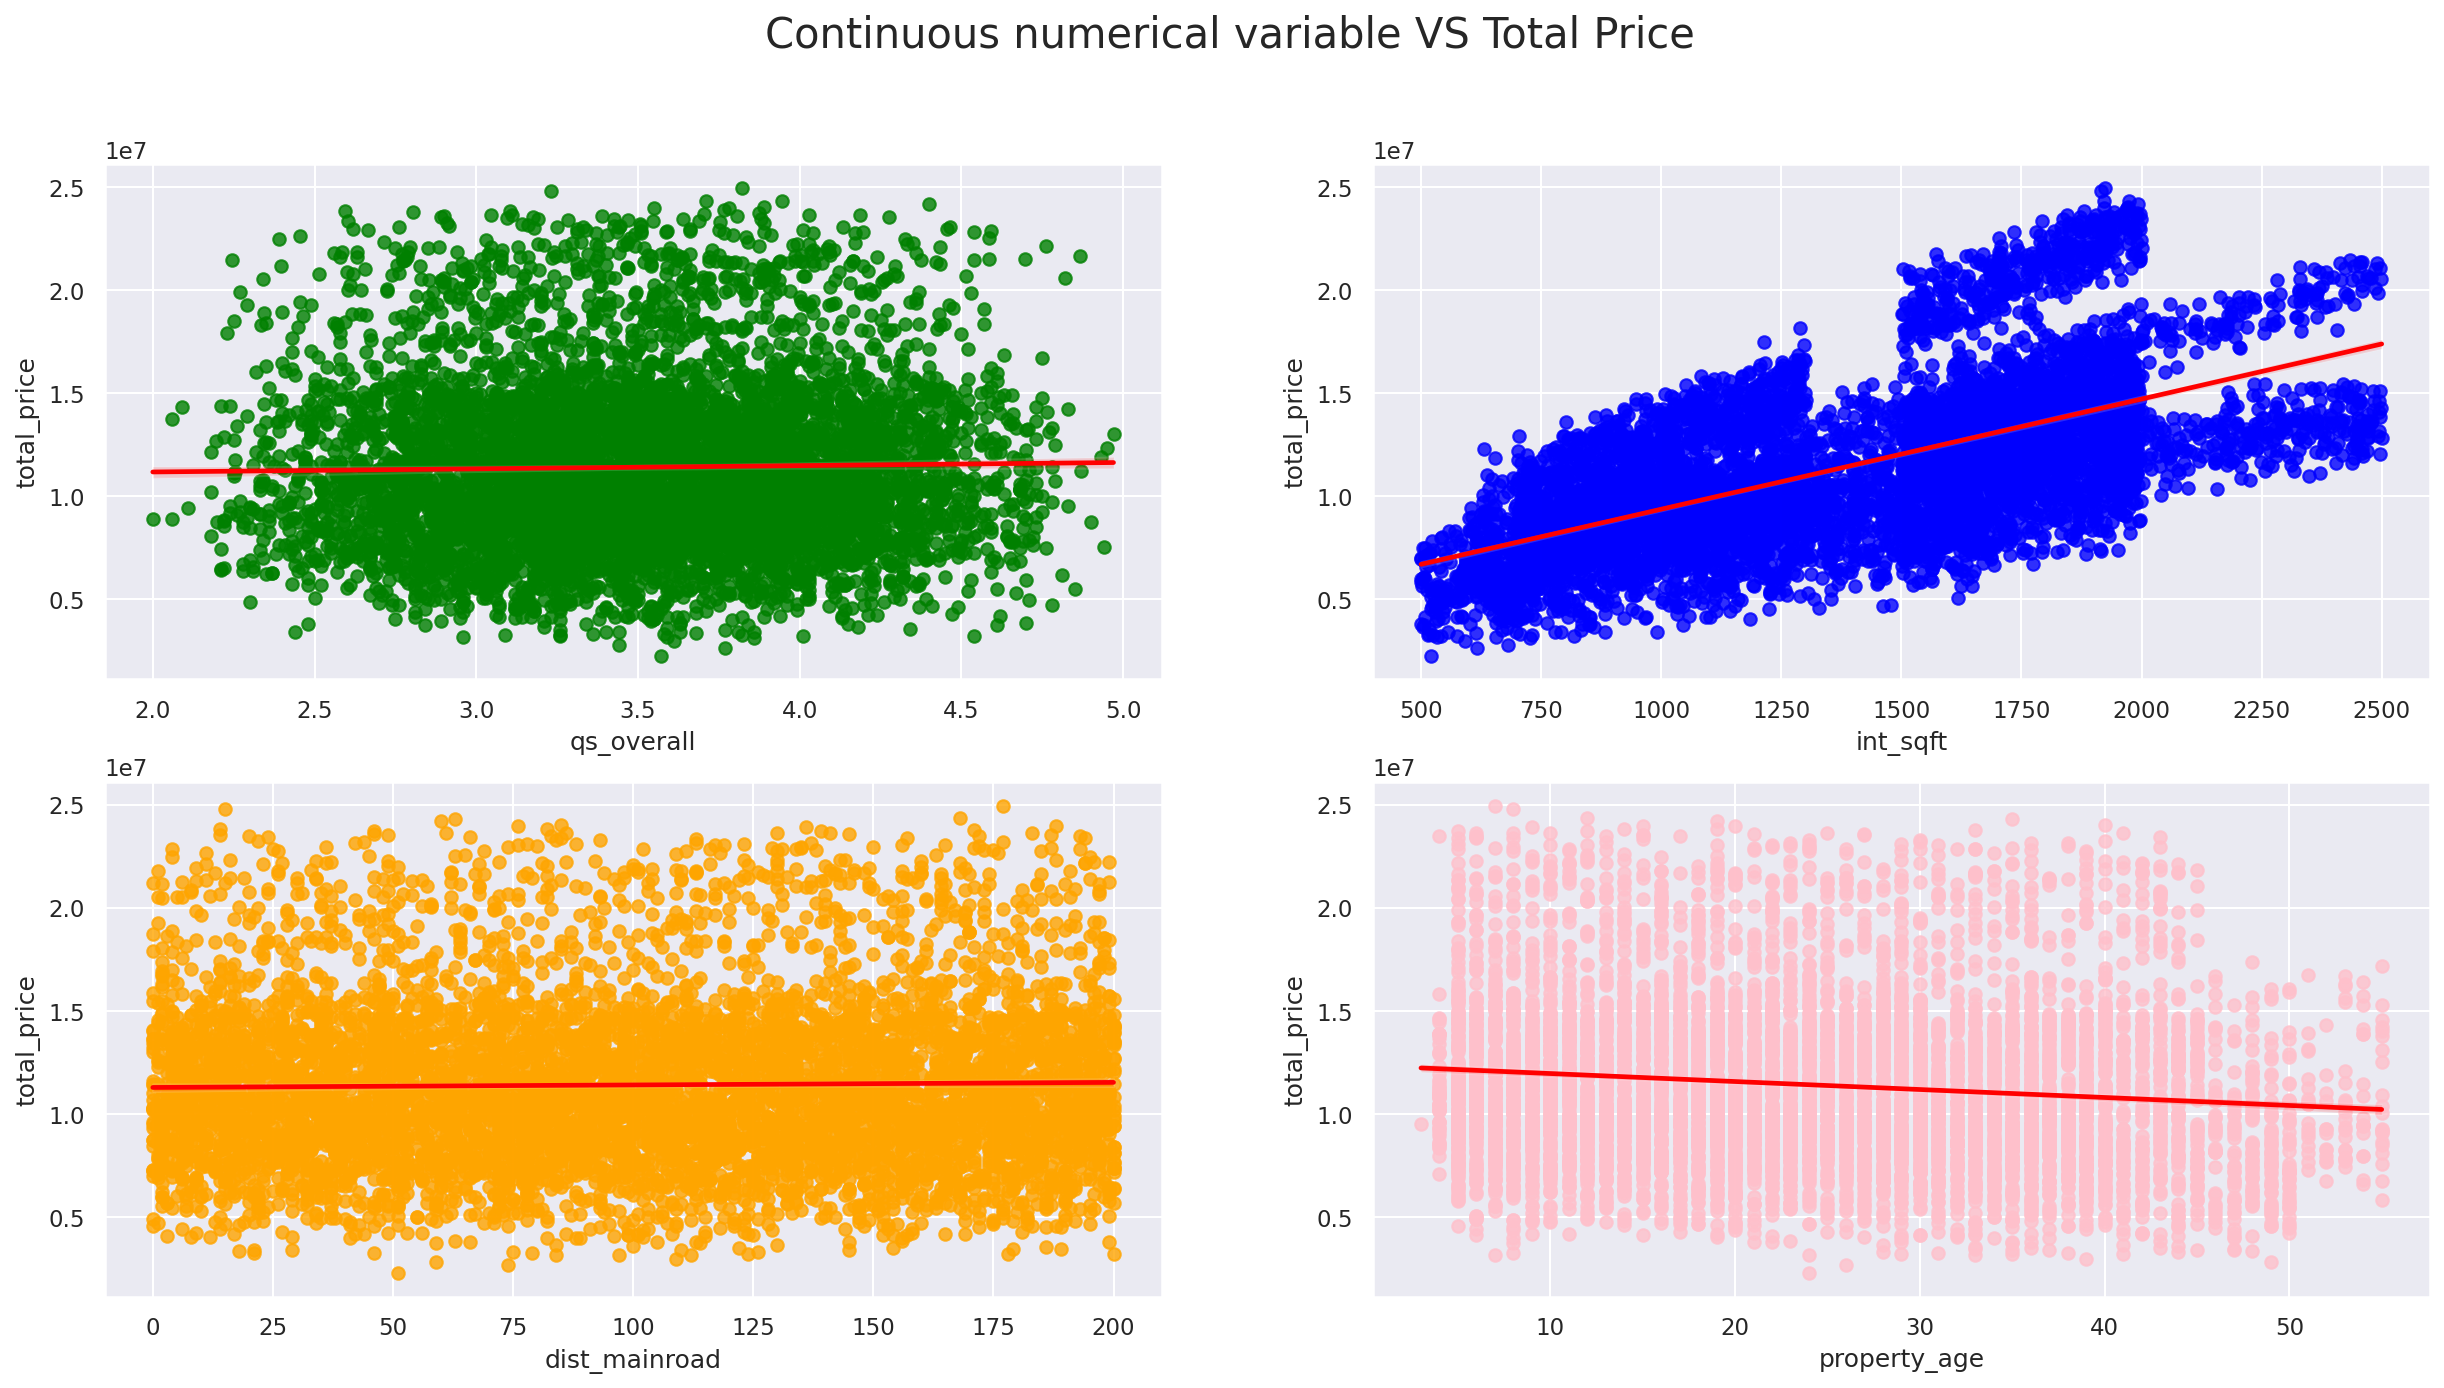

In [170]:
plt.figure(figsize=(20, 10), dpi=150)

plt.subplot(2,2,1)
sns.regplot(df1.qs_overall, df1.total_price, scatter_kws={"color":"green"}, line_kws={"color":"red"})

plt.subplot(2,2,2)
sns.regplot(df1.int_sqft, df1.total_price, scatter_kws={"color":"blue"}, line_kws={"color": "red"})

plt.subplot(2,2,3)
sns.regplot(df1.dist_mainroad, df1.total_price, scatter_kws={"color":"orange"}, line_kws={"color":"red"})

plt.subplot(2,2,4)
sns.regplot(df1.property_age, df1.total_price, scatter_kws ={"color":"pink"}, line_kws={"color":"red"})

plt.suptitle("Continuous numerical variable VS Total Price", fontsize=20)
plt.show()

Here we can come with conclusion :
 . In qs_overall there is no relation in feature so we will drop it
  . In int_sqft there is relation in featute so this feature will use for us so keep it
   . In dist_mainroad there is no relation in feature so we will drop it
 . In property_age there is small relation so it will use for us so keep it

## 2) Decsrete numerical variable
Here we are plotting all our Decsrete numerical variable columns with total price of the house to figure out, is there any relation between Decsrete numerical variable features column and total sales.

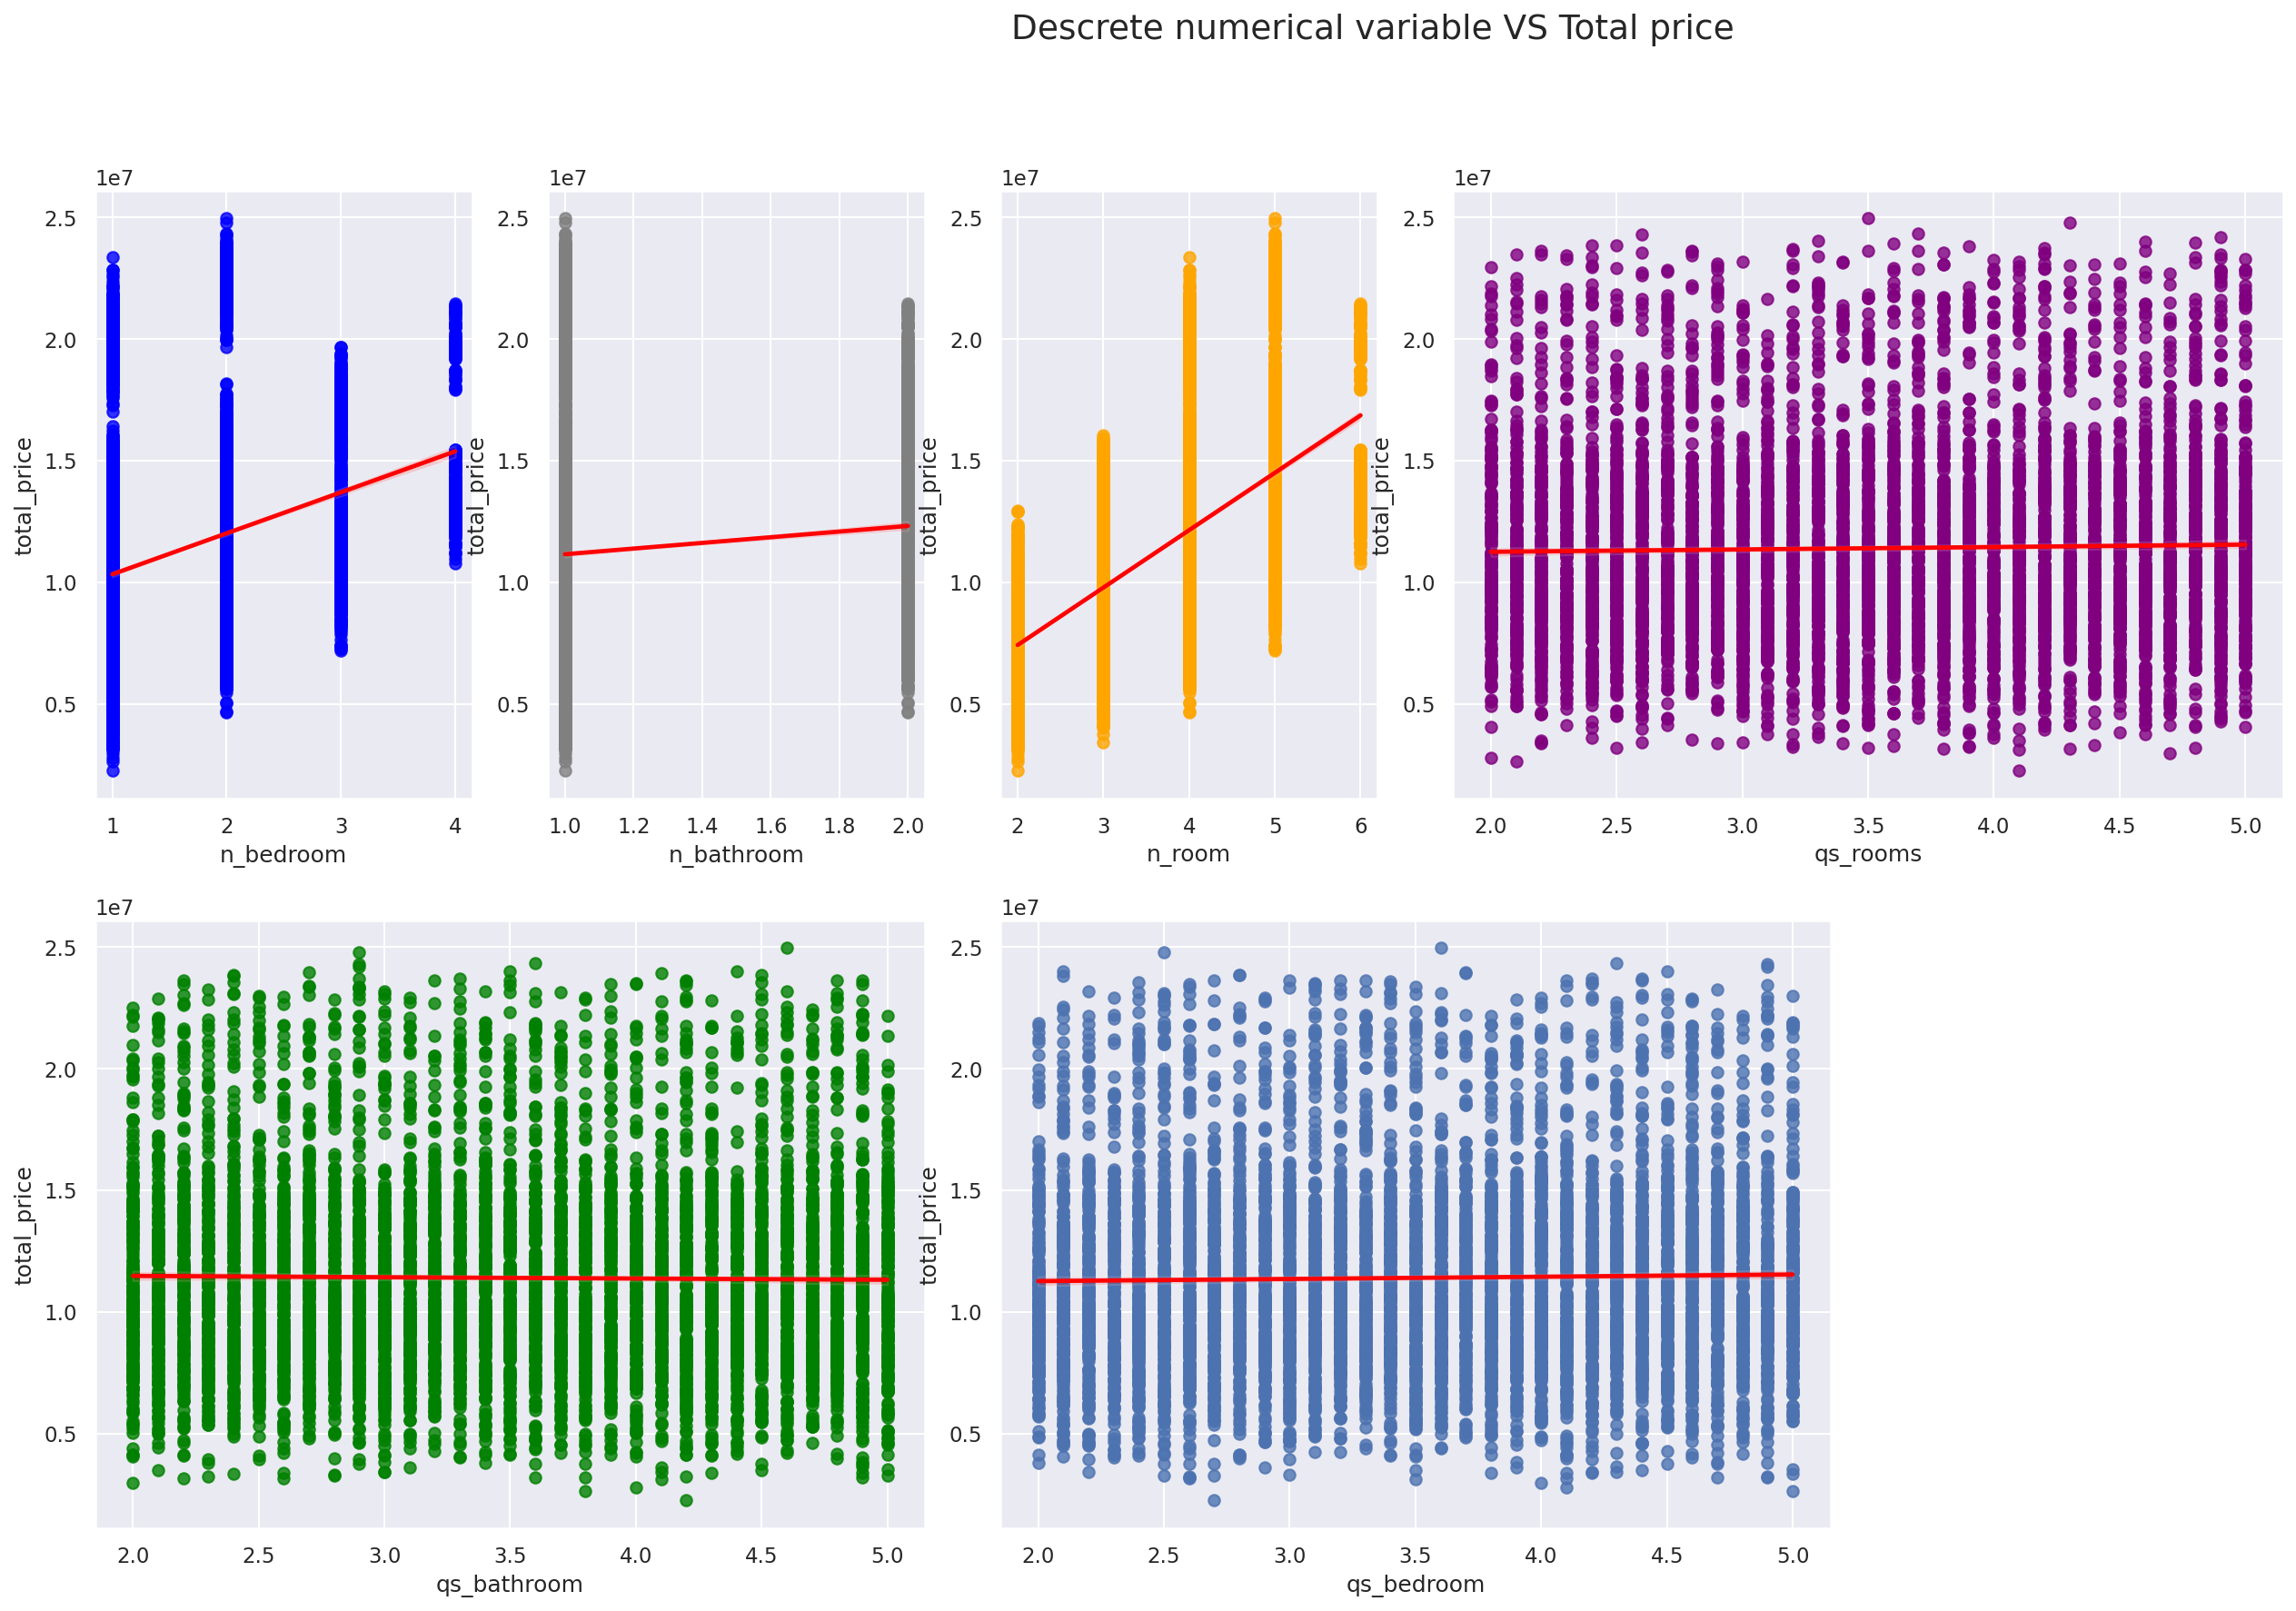

In [171]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0))
sns.regplot(df1.n_bedroom, df1.total_price, scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,1))
sns.regplot(df1.n_bathroom, df1.total_price, scatter_kws={"color": "grey"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,2))
sns.regplot(df1.n_room, df1.total_price, scatter_kws={"color": "orange"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(0,3),colspan=2)
sns.regplot(df1.qs_rooms, df1.total_price, scatter_kws={"color": "purple"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.regplot(df1.qs_bathroom, df1.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})

plt.subplot2grid((2,6),(1,2),colspan=2)
sns.regplot(df1.qs_bedroom, df1.total_price, line_kws={"color": "red"})

plt.suptitle("Descrete numerical variable VS Total price", fontsize=18)
plt.show()


Here we can come to conclusion that:

 .In n_bedroom we find good relation so this feature will be very important for us so we will keep it.

 .In n_bathroom we find small relation so this feature will be useful for us so we will keep it. 

 .In n_room we find good relation so this feature will be very important for us so we will keep it.

 .In qs_rooms we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

 .In qs_bathroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

 .In qs_bedroom we didn't find any relation so this feature will be of no use or very less us for us so we will drop it.

## Commision and Registration fee columns:
On top of all numerical columns we are given registration fee and commission columns on which sales price don't depends on but these two columns are completly depended on sales column value. That means after determining the sales price the commission and registration fee are paid. Hence, these two columns don't directly contribute to determine the sale we can add value of these two column on sales column and try to predict total sale price. And at the end compare this result with only predicted sales price.

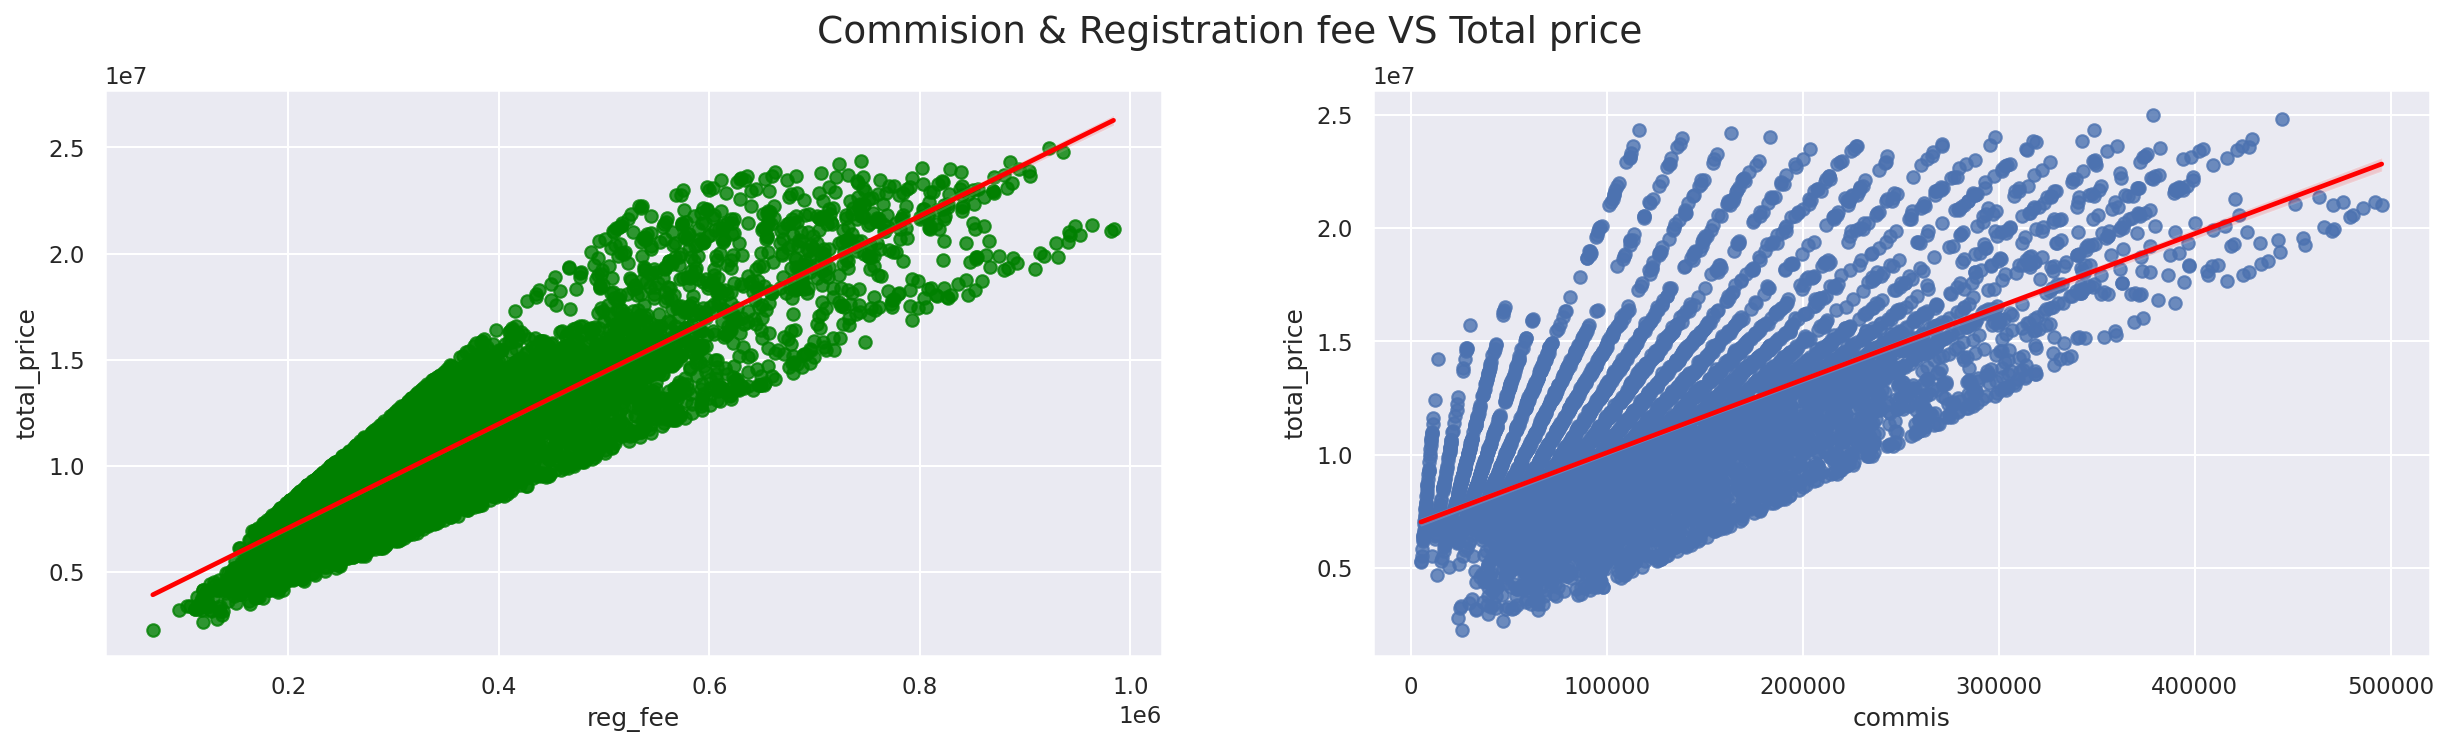

In [172]:
plt.figure(figsize=(20, 5), dpi=150)

plt.subplot(1,2,1)
sns.regplot(df1.reg_fee, df1.total_price, scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.subplot(1,2,2)
sns.regplot(df1.commis, df1.total_price, line_kws={"color": "red"})

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

# Categorical Columns
Plotting of Categorical data vs Target
Here we are plotting all our catagorical columns with total price of the house to figure out, is there any relation between catagorical features column and total sales.

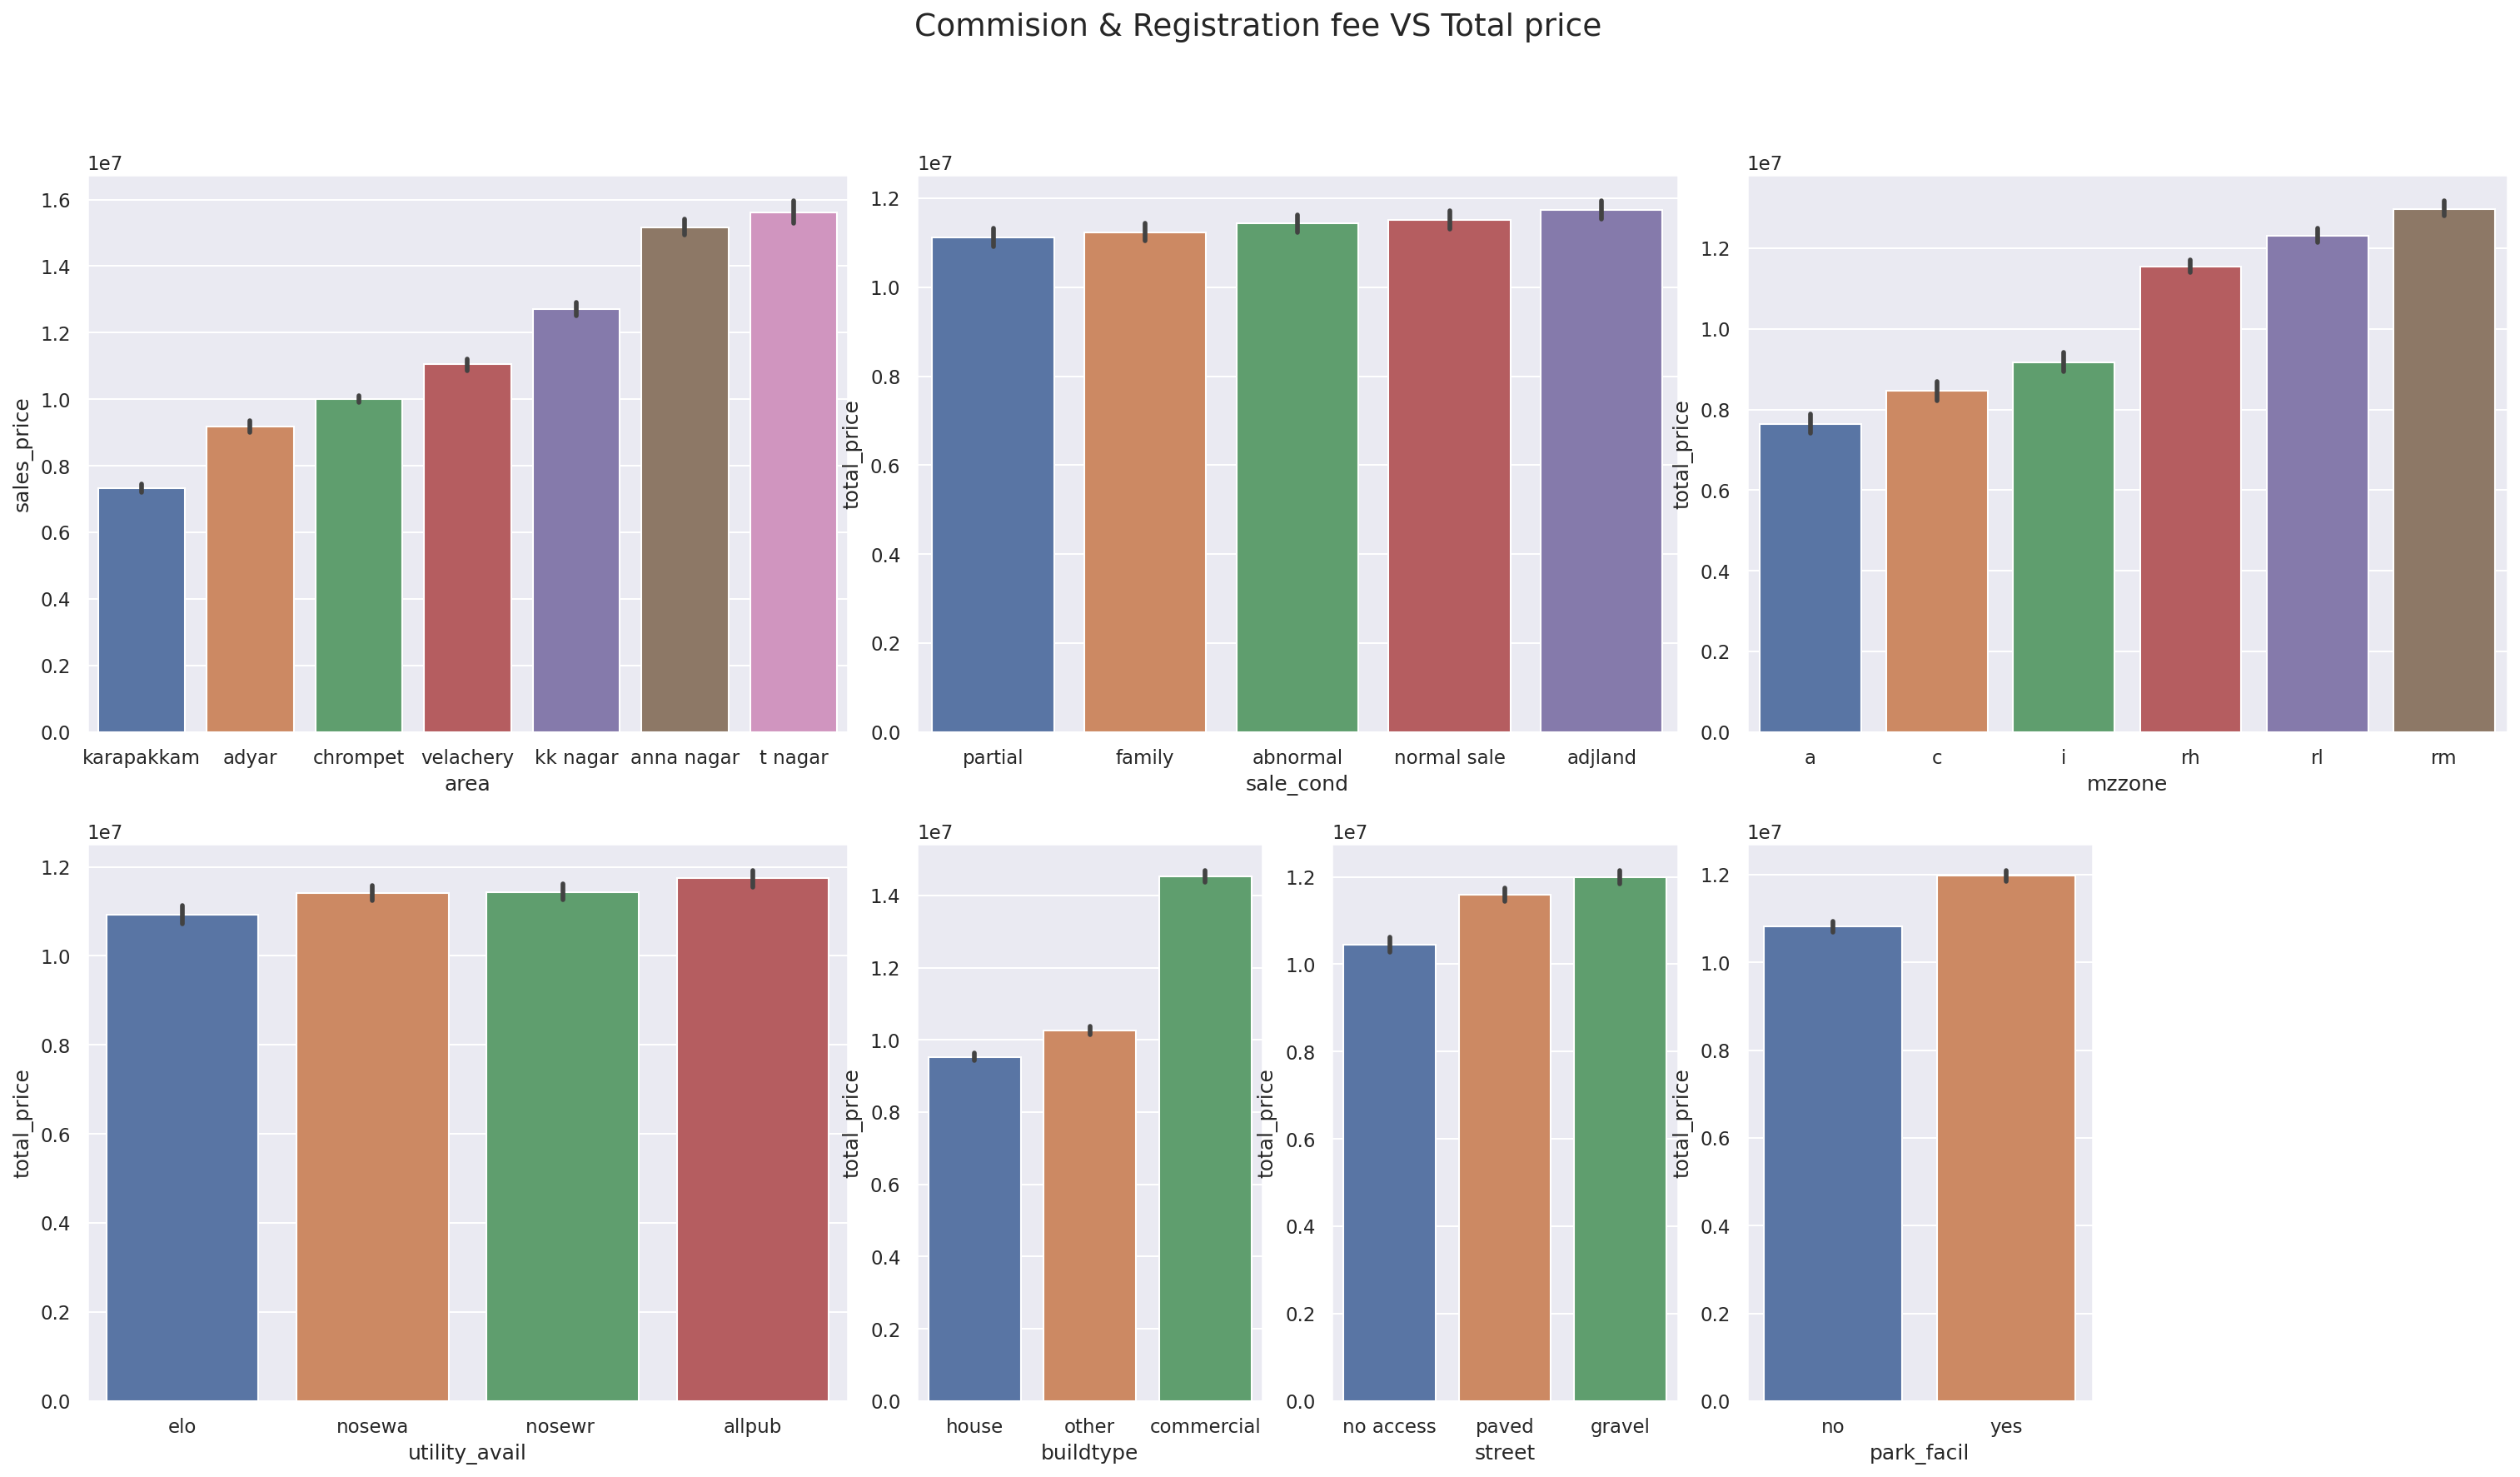

In [173]:
plt.figure(figsize=(25, 13), dpi=150)

plt.subplot2grid((2,6),(0,0),colspan=2)
sns.barplot(x=df1.area,y=df1.sales_price,order=df1.groupby('area')['sales_price'].mean().reset_index().sort_values('sales_price')['area'])

plt.subplot2grid((2,6),(0,2),colspan=2)
sns.barplot(x=df1.sale_cond,y=df1.total_price,order=df1.groupby('sale_cond')['total_price'].mean().reset_index().sort_values('total_price')['sale_cond'])

plt.subplot2grid((2,6),(0,4),colspan=2)
sns.barplot(x=df1.mzzone,y=df1.total_price,order=df1.groupby('mzzone')['total_price'].mean().reset_index().sort_values('total_price')['mzzone'])

plt.subplot2grid((2,6),(1,0),colspan=2)
sns.barplot(x=df1.utility_avail,y=df1.total_price,order=df1.groupby('utility_avail')['total_price'].mean().reset_index().sort_values('total_price')['utility_avail'])

plt.subplot2grid((2,6),(1,2))
sns.barplot(x=df1.buildtype,y=df1.total_price,order=df1.groupby('buildtype')['total_price'].mean().reset_index().sort_values('total_price')['buildtype'])

plt.subplot2grid((2,6),(1,3))
sns.barplot(x=df1.street,y=df1.total_price,order=df1.groupby('street')['total_price'].mean().reset_index().sort_values('total_price')['street'])

plt.subplot2grid((2,6),(1,4))
sns.barplot(x=df1.park_facil,y=df1.total_price,order=df1.groupby('park_facil')['total_price'].mean().reset_index().sort_values('total_price')['park_facil'])

plt.suptitle("Commision & Registration fee VS Total price", fontsize=18)
plt.show()

Here we can come to conclusion that:

 .In area when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

 .In sale_cond when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

 .In mzzone when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

 .In utility_avain when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

 .In buildtype when we sort column in respect of total_price we didn't find linear relation in this categorical feature but it may beimportant for us so we will keep it and do OneHotEncoding on this column data.

 .In street when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

 .In park_facil when we sort column in respect of total_price we find good relation linear ordinal relation in this categorical feature and it will be important for us so we will keep it and do label encoding by preserving the order.

## Encoding
From here onwards encoding of data will start in for categorical data in sequential manner in numerical so that computer can understand those data columns.

## OneHotEncoder
Here we are encoding nominal categorical columns which don't have any order present in them with OneHotEncoder. But to be simple we have just used get_dummies feature from pandas.

In [174]:
df1 = pd.get_dummies(df1, columns=['buildtype'])

## Label Encoder (Mapping)
Here we are encoding ordinal categorical columns which have some order present in them and we havr to preserve the order so here we use Lebel/Ordinal encoder. So, for simplicity i have just simply mappes the values in order of the data.

In [175]:
# Encoding the area column order-wise 
df1.area =df1.area.map({'karapakkam': 1,
                           'adyar': 2, 
                           'chrompet' : 3,
                           'velachery' : 4,
                           'kk nagar' : 5, 
                           'anna nagar' : 6,
                           't nagar' : 7})

# Encoding the sale_cond column order-wise 
df1.sale_cond = df1.sale_cond.map({'partial' : 1, 
                                     'family' : 2, 
                                     'abnormal' : 3, 
                                     'normal sale' : 4,
                                     'adjland' : 5})

# Encoding the park_facil column order-wise 
df1.park_facil = df1.park_facil.map({'yes':1,
                                       'no':0})

# Encoding the utility_avail column order-wise 
df1.utility_avail = df1.utility_avail.map({'elo' : 1, 
                                             'nosewa' : 2, 
                                             'nosewr ' : 3,
                                             'allpub' : 4})
                                          
# Encoding the street column order-wise 
df1.street = df1.street.map({'no access' : 1,
                               'paved' : 2, 
                               'gravel' : 3})


# Encoding the mzzone column order-wise 
df1.mzzone = df1.mzzone.map({'a' : 1,
                               'c' : 2,
                               'i' : 3,
                               'rl' : 5,
                               'rh' : 4,
                               'rm' : 6})


In [176]:
# Removing unnecessary columns and Rearranging the columns of dataframe 
df1 = df1.reindex(columns = ['area', 'sale_cond', 'park_facil',
       'buildtype_commercial', 'buildtype_house','buildtype_other', 'utility_avail',
       'street', 'mzzone', 'property_age', 'int_sqft', 'dist_mainroad', 'n_bedroom',
       'n_bathroom', 'n_room', 'qs_rooms', 'qs_bathroom', 'qs_bedroom',
        'qs_overall', 'reg_fee', 'commis', 'sales_price', 'total_price'])

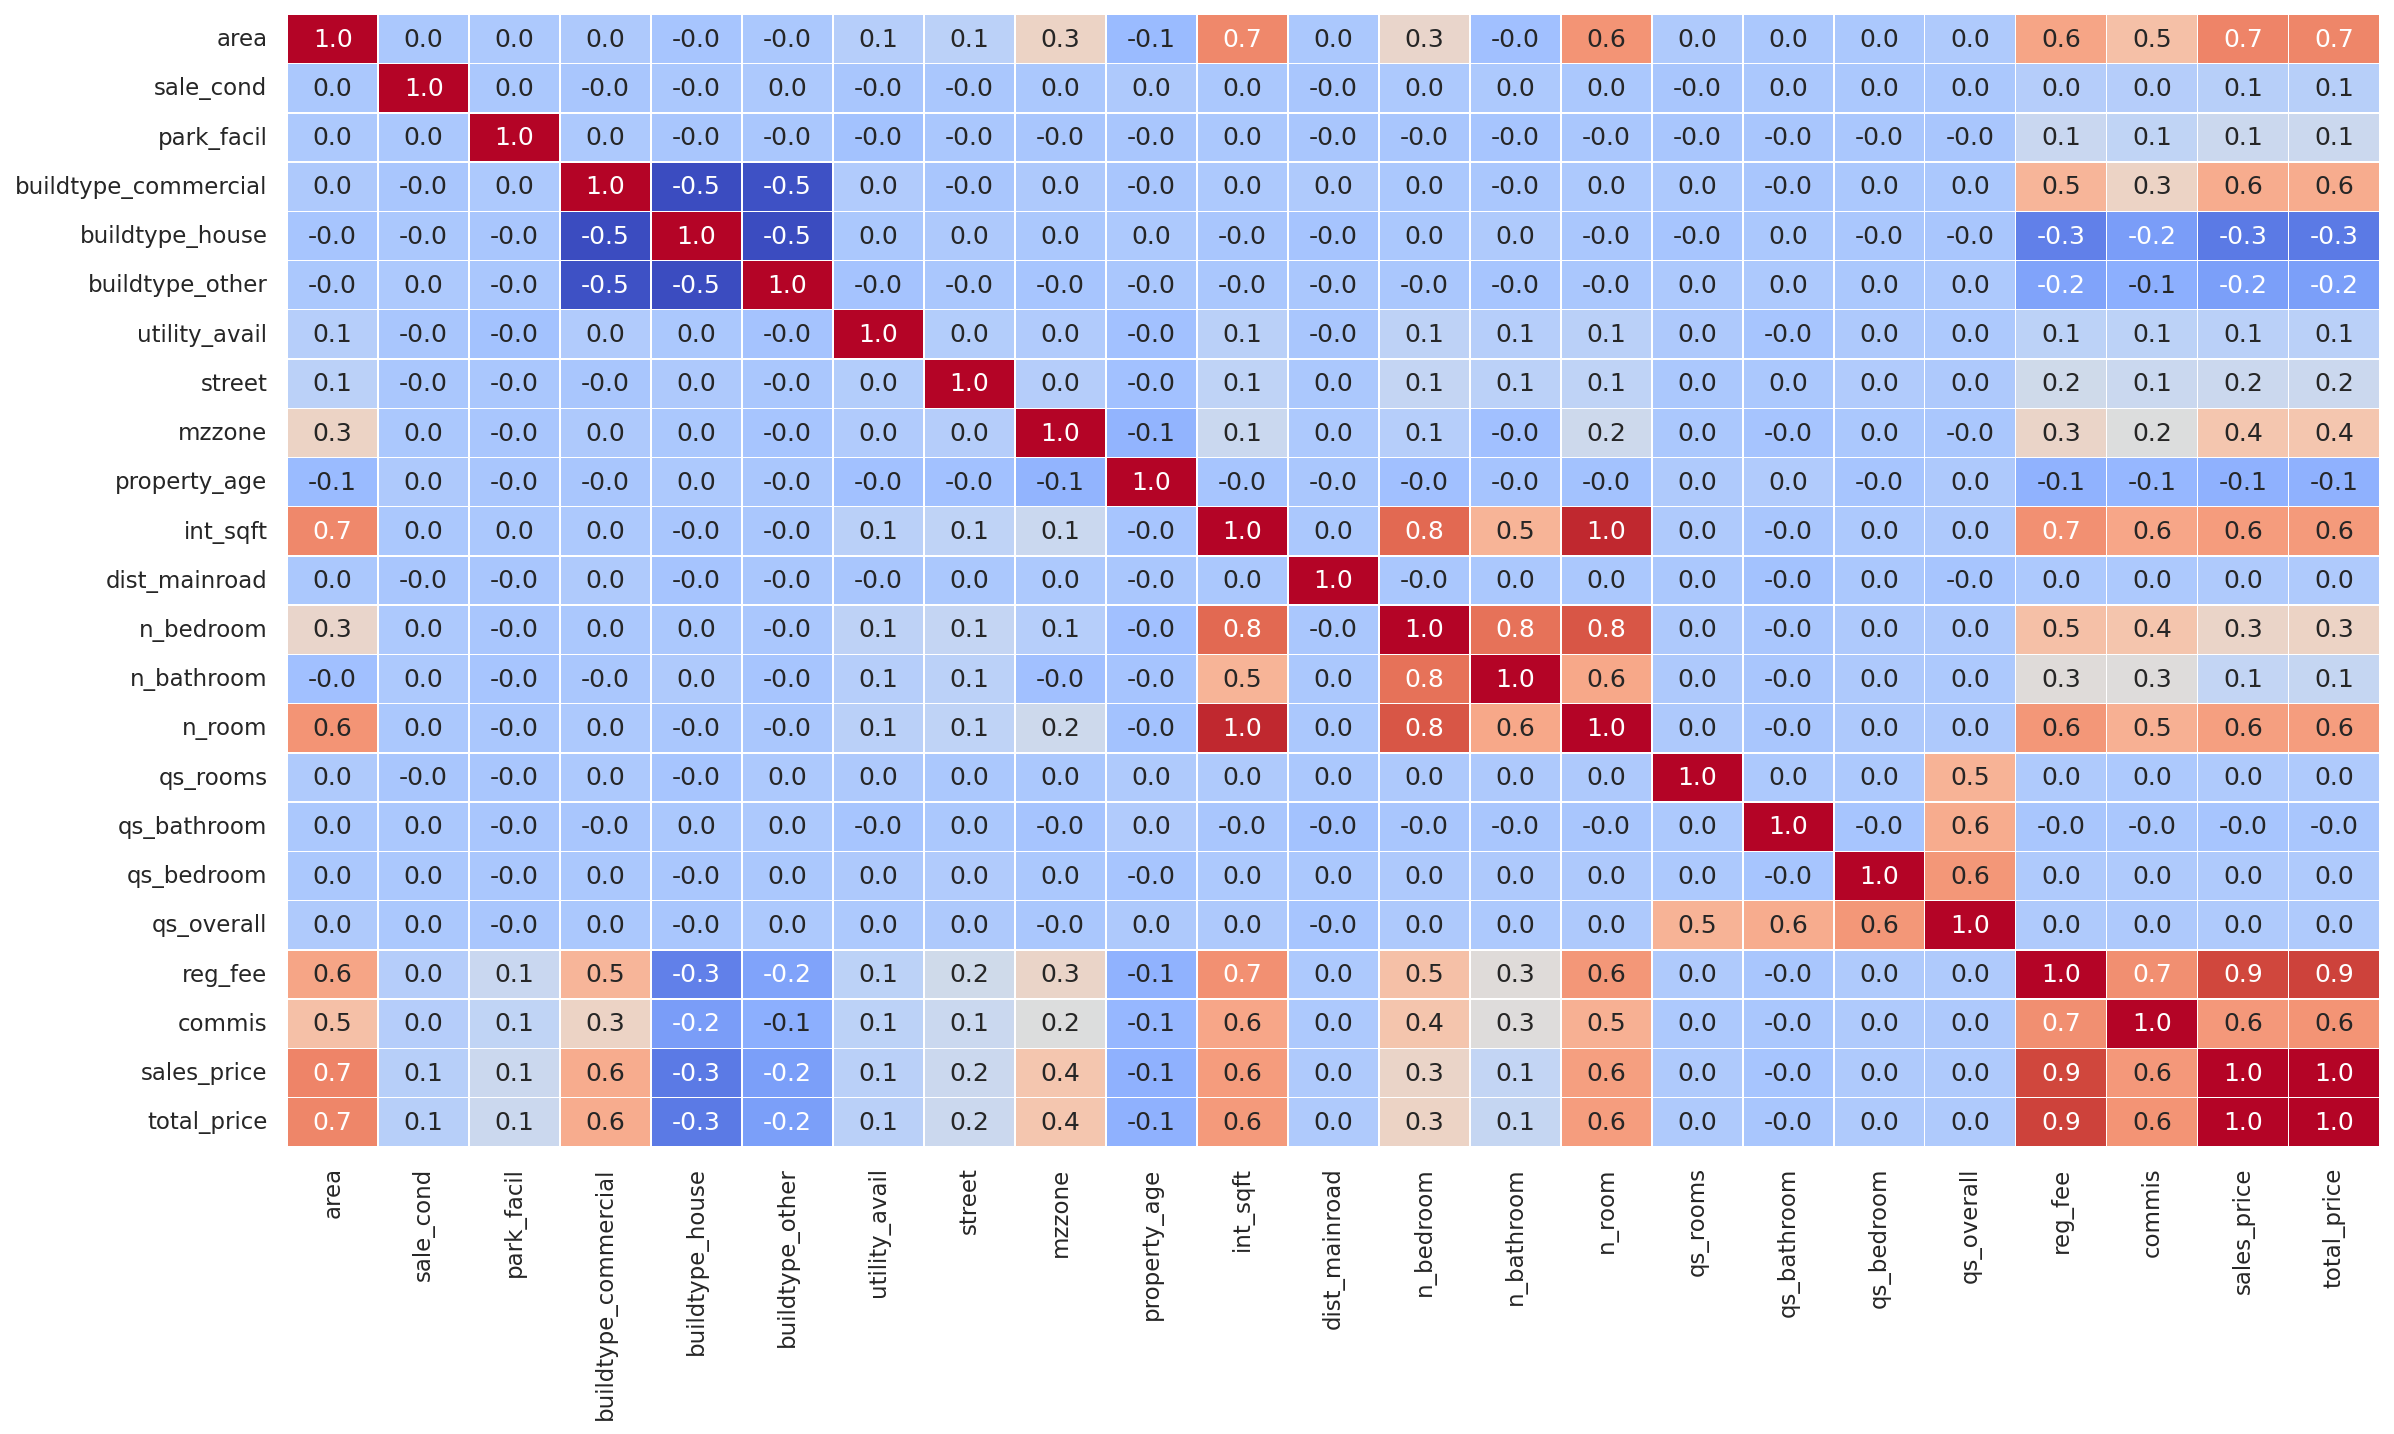

In [177]:
plt.figure(figsize=(18,10), dpi=150)
sns.heatmap(df1.corr(method='pearson'), cbar=False, annot=True, fmt='.1f', linewidth=0.2, cmap='coolwarm');

Interpretation:-

Here after encoding all columns we can see that in categorical columns also there are some correlation between target and features as we can there is a very good correlation between some columns of our data which are soon in reddish colour.



In [179]:
df1.head(5)

area  sale_cond  park_facil  buildtype_commercial  buildtype_house  \
0     1          3           1                     1                0   
1     6          3           0                     1                0   
2     2          3           1                     1                0   
3     4          2           0                     0                0   
4     1          3           1                     0                0   

   buildtype_other  utility_avail  street  mzzone  property_age  ...  \
0                0              4       2       1            44  ...   
1                0              4       3       4            11  ...   
2                0              1       3       5            20  ...   
3                1              3       2       3            22  ...   
4                1              4       3       2            30  ...   

   n_bathroom  n_room  qs_rooms  qs_bathroom  qs_bedroom  qs_overall  reg_fee  \
0           1       3       4.0          3.9         4.9       4.330   380000   
1           1       5       4.9          4.2         2.5       3.765   760122   
2           1       3       4.1          3.8         2.2       3.090   421094   
3           2       5       4.7          3.9         3.6       4.010   356321   
4           1       3       3.0          2.5         4.1       3.290   237000   

   commis  sales_price  total_price  
0  144400      7600000      8124400  
1  304049     21717770     22781941  
2   92114     13159200     13672408  
3   77042      9630290     10063653  
4   74063      7406250      7717313  

[5 rows x 23 columns]

In [180]:
# Removing unnecessary features thich has negligible relation with total_price
df2 = df1.copy()
df2.drop(['qs_overall', 'dist_mainroad', 'qs_overall','qs_rooms', 'qs_bathroom', 'qs_bedroom', 'reg_fee',	'commis'], axis=1, inplace=True)

In [181]:
input_cols = ['area', 'sale_cond', 'park_facil', 'buildtype_commercial',	'buildtype_house',
              'buildtype_other', 'utility_avail', 'street', 'mzzone', 'property_age',
              'int_sqft', 'n_bedroom', 'n_bathroom', 'n_room']

target_cols = 'sales_price'
target1_cols = 'total_price'

input = df2[input_cols].copy()
target = df2[target_cols].copy()
target1 = df2[target1_cols].copy()

## Splitting the data for training and testing

In [182]:
X_train, X_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state = 7)

## Scalling

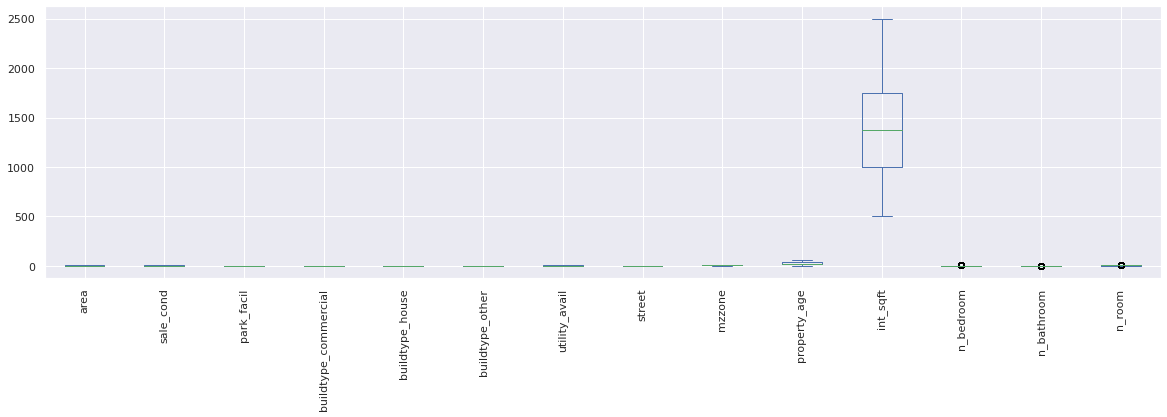

In [183]:
pd.DataFrame(X_train, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)
plt.show()

Interpretation:-

Here we can clearly see in our features column int_sqft is the only feature which which contains very large value and all the remaining of the feature column are pretty small.

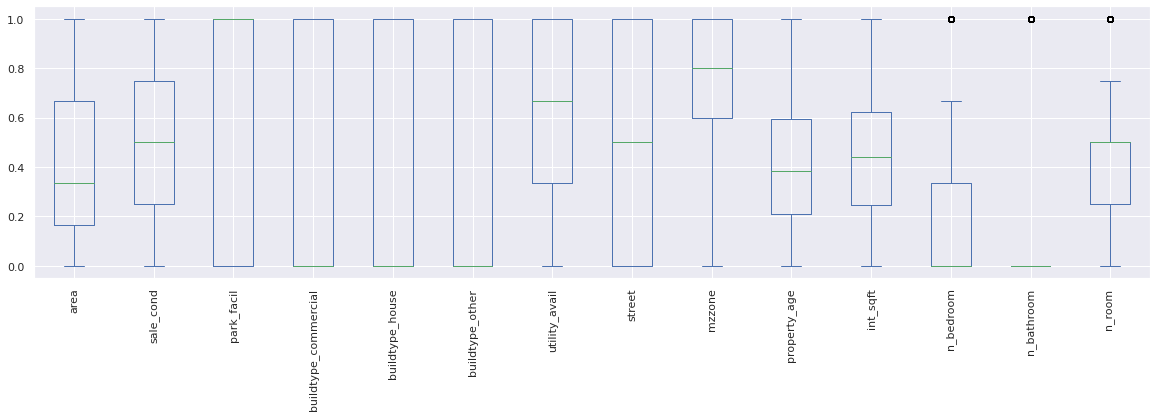

In [184]:
mm = MinMaxScaler().fit(X_train)
X_train_mm = mm.transform(X_train)
X_train_mm = pd.DataFrame(X_train_mm, columns=X_train.columns)
X_test_mm = mm.transform(X_test)
X_test_mm = pd.DataFrame(X_test_mm, columns=X_test.columns)
X_train_mm.plot.box(figsize=(20,5), rot=90)
plt.show()

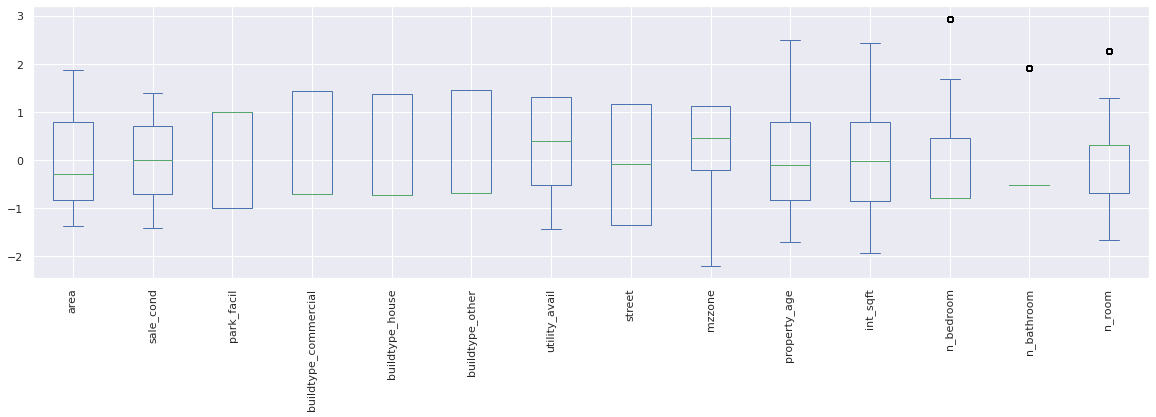

In [185]:
ss = StandardScaler().fit(X_train)
X_train_ss = ss.transform(X_train)
X_train_ss = pd.DataFrame(X_train_ss, columns=X_train.columns)
X_test_ss = ss.transform(X_test)
X_test_ss = pd.DataFrame(X_test_ss, columns=X_test.columns)
X_train_ss.plot.box(figsize=(20,5), rot=90)
plt.show()

Here with the help of MinMaxScaler and StandardScaler we are trying to scale the data so that the spread of values between all the features become equal so that the model which train the data by using distace distance doesn't get very large values as their features.

## Model Training
From here on we will start building model on top of data which we have prepared till now and we will try all different kind of machine learning models and try to get best r-square score for all 3 type of data that are normaldata, MinMaxScaled data and StandardScaler data.

LinearRegression

In [186]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

# lr = LinearRegression()
lr.fit(X_train_ss, y_train)
y_predlrss = lr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predlrss))

# lr = LinearRegression()
lr.fit(X_train_mm, y_train)
y_predlrmm = lr.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predlrmm))

R2- SCORE: 0.923424259980204
R2- SCORE(Standardscaler): 0.9235956445666523
R2- SCORE(Minmaxscaled): 0.9234463807033615


KNearestNeighbors

Orange and Blue depict RSME for MinMaxScaler and blue


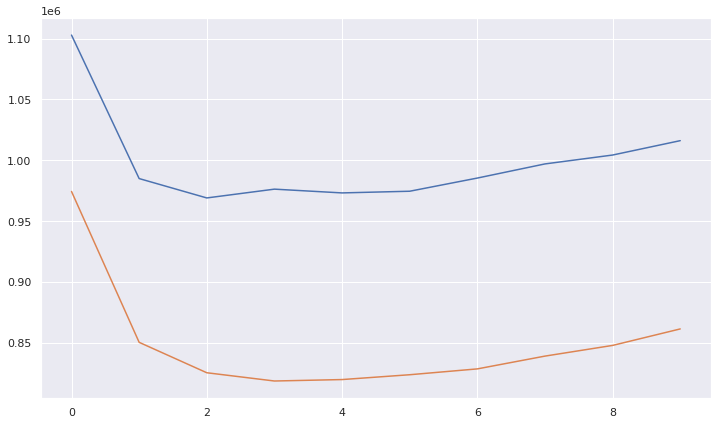

In [187]:
rmse_val = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_mm, y_train)
    pred=model.predict(X_test_mm)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val.append(error)
curve = pd.DataFrame(rmse_val)

rmse_val1 = []
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train_ss, y_train)
    pred=model.predict(X_test_ss)
    error = sqrt(mean_squared_error(y_test,pred))
    rmse_val1.append(error)
curve1 = pd.DataFrame(rmse_val1)

print('Orange and Blue depict RSME for MinMaxScaler and blue')
plt.figure(figsize=(12,7))
plt.plot(curve)
plt.plot(curve1)
plt.show()

In [188]:
knn = KNeighborsRegressor(n_neighbors=100)
knn.fit(X_train, y_train)
y_predknn = knn.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_predknn))

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train_mm, y_train)
y_predknn_mm = knn.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_predknn_mm))

knn = KNeighborsRegressor(n_neighbors=4)
knn.fit(X_train_ss, y_train)
y_predknn_ss = knn.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_predknn_ss))

R2- SCORE: 0.43309895459186276
R2- SCORE(Minmaxscaled): 0.9338292932490762
R2- SCORE(Standardscaler): 0.9527770963012473


DecisionTree

In [189]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_dt))

dt.fit(X_train_mm, y_train)
y_pred_dtmm = dt.predict(X_test_mm)
print('R2- SCORE(Minmaxscaled):', metrics.r2_score(y_test,y_pred_dtmm))

dt.fit(X_train_ss, y_train)
y_pred_dtss = dt.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_dtss))

R2- SCORE: 0.9751143693253586
R2- SCORE(Minmaxscaled): 0.9751194214916766
R2- SCORE(Standardscaler): 0.9755306032812254


## Ensemble Learning

### Voting Regressor

In [190]:
dt = DecisionTreeRegressor()
knn = KNeighborsRegressor(n_neighbors=100)
lr = LinearRegression()
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
gbr = GradientBoostingRegressor(learning_rate=.5)
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)

vr = VotingRegressor([('dt', dt), ('knn', knn), ('lr', lr), ('rf', rf), ('xg', xg), ('gbr', gbr), ('etr', etr)])

vr.fit(X_train, y_train);
y_pred_vr = vr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_vr))

vr.fit(X_train_ss, y_train);
y_pred_vrss = vr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_vrss))

vr.fit(X_train_mm, y_train);
y_pred_vrmm = vr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_vr))

R2- SCORE: 0.9791813827041789
R2- SCORE(Standardscaler): 0.9897649775655782
R2- SCORE(MinMaxScaler): 0.9791813827041789


Random Forest

In [191]:
rf = RandomForestRegressor(n_estimators= 100, max_depth = 15, max_features='sqrt')
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_rf))

rf.fit(X_train_mm, y_train);
y_pred_rfmm = rf.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_rfmm))

rf.fit(X_train_ss, y_train);
y_pred_rfss = rf.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_rfss))

R2- SCORE: 0.9869180916874756
R2- SCORE(minmaxscaled): 0.9870246143317402
R2- SCORE(Standardscaler): 0.9868518932955321


Extra Tree Regressor

In [192]:
etr = ExtraTreesRegressor(n_estimators=100, random_state=0).fit(X_train, y_train)
y_pred_etr = etr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_etr))

y_pred_etrmm = etr.predict(X_test_mm)
print('R2- SCORE(minmaxscaled):', metrics.r2_score(y_test,y_pred_etrmm))

y_pred_etrss = etr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_etrss))

R2- SCORE: 0.990943175687814
R2- SCORE(minmaxscaled): -3.4543088231107575
R2- SCORE(Standardscaler): -2.9228905733870048


GradientBoostingRegressor

In [193]:
for lr in [0.1,0.3,0.5,0.8,1]:
  model= GradientBoostingRegressor(learning_rate=lr)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.1  Train score :  0.9918884151594325  Test score :  0.9912206119939374
Learning rate :  0.3  Train score :  0.997053105407478  Test score :  0.996350194502074
Learning rate :  0.5  Train score :  0.9977218437506626  Test score :  0.9969356479975463
Learning rate :  0.8  Train score :  0.9977596041412032  Test score :  0.9961278133460032
Learning rate :  1  Train score :  0.9979310033973539  Test score :  0.9967003121655903


In [194]:
gbr = GradientBoostingRegressor(learning_rate=.5)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

gbr.fit(X_train_mm, y_train)
y_pred_gbrmm = gbr.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

gbr.fit(X_train_ss, y_train)
y_pred_gbrss = gbr.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9969359356027168
R2- SCORE(MinMaxScaler): 0.996931879791019
R2- SCORE(Standardscaler): 0.996928043928711


XGBoost

In [195]:
for lr in [0.2,0.5,0.7,0.8,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0)
  model.fit(X_train, y_train)
  print("Learning rate : ", lr, " Train score : ", model.score(X_train,y_train), " Test score : ", model.score(X_test,y_test))

Learning rate :  0.2  Train score :  0.9967270044068283  Test score :  0.9961621441920422
Learning rate :  0.5  Train score :  0.9977452756031117  Test score :  0.9970817256045346
Learning rate :  0.7  Train score :  0.9983913785754902  Test score :  0.9976933662773312
Learning rate :  0.8  Train score :  0.997939920648442  Test score :  0.9964788933275089
Learning rate :  1  Train score :  0.9978139598852349  Test score :  0.996720315945207


In [197]:
xg = xgb.XGBRegressor(learning_rate = .7, n_estimators=100, verbosity = 0)
xg.fit(X_train, y_train)
y_pred_gbr = xg.predict(X_test)
print('R2- SCORE:', metrics.r2_score(y_test,y_pred_gbr))

xg.fit(X_train_mm, y_train)
y_pred_gbrmm = xg.predict(X_test_mm)
print('R2- SCORE(MinMaxScaler):', metrics.r2_score(y_test,y_pred_gbrmm))

xg.fit(X_train_ss, y_train)
y_pred_gbrss = xg.predict(X_test_ss)
print('R2- SCORE(Standardscaler):', metrics.r2_score(y_test,y_pred_gbrss))

R2- SCORE: 0.9976933662773312
R2- SCORE(MinMaxScaler): 0.9976933662773312
R2- SCORE(Standardscaler): 0.9976917294994156


Here after training all kinds of model we can see that MinMaxScaled or StandardScaled data model doesn't matter make much difference they give very similar results. But we can surely say that GradientBoostingRegressor and XGBRegressor outperformed most of the machine learning model and GradientBoostingRegressor give 0.99693 as R2-score and XGBRegressor gives 0.997693 as R2-score and I would also like to mention ExtraTreesRegressor with R2-score of 0.99094. The results of all the models of the child being trained in this project I mentioned below:

# R2 score


 .GradientBoostingRegressor give score of 0.9969 as R2-score.

 .XGBRegressor gives score of 0.997693 as R2-score.

 .ExtraTreesRegressor gives score of 0.99094 as R2-score.

 .RandomForestRegressor gives score of 0.986918 as R2-score.

 .LinearRegression gives score of 0.92342 as R2-score.

 .KNeighborsRegressor gives score of 0.952777

 .VotingRegressor gives score of 0.979181 as R2-score.











# conclusion:

Chennai House Price Prediction Project we can conclude there are so many aspects of training machine learning model

  . First we clean the Data and try to get all the features in a suitable model

  . Exploratory Data Analysis there are some coorelation between feature and target 

  . Distribution of features in column they are normally distributed but very few column of data is slightly skewed



  . Plotting Featurte and Target they are 

      .Numerical columns 

      .Categorical columns

     plotting the data using scatter plot abd box plot to find the distribution and relation of feature through plotting

  . Encoding the data using ONEHOT ENCODER because there is no order in data and they are nominal categorical columns so we use label encoder

  .Removing unnecessory columns of feature

  .splitting and scalling the data

  . Training the model to get best R2 score we use 3 types of data normal, MinMaxScaled data, StandardScaler data

  .We train the model by using sklearn and evaluate with most famous algorthams are LinearRegression, KNearestNeighbors, DecisionTree, RandomForest, Ensemble Learning , Voting Regressor, Extra Tree Regressor, GradientBoostingRegressor, XGBoost 

  . This is an Regression problem because we are predicting the house price in chennai at different locality 

  . we get an highest  R2 score 99.76 (99%) in XGBoost Regressor so the model is perfect